## PCA in Image compression

In [19]:
import sys
from sklearn.decomposition import PCA
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt

filename = 'tiger.png'

In [20]:
def get_image_components(img, n_comp=200):
    # Get channels for Red, Green and Blue -> img[:,:,0], img[:,:,1], img[:,:,2]
    channel_pca = list()
    for i in range(3): 
        # Apply PCA in each the channels
        channel_pca.append(PCA(n_comp).fit(img[:,:,i]))
    return channel_pca

In [21]:
def reduce_image(img, channel_components):
    channel_reduced = list()
    for i in range(3): 
        # Linear transformation into subspace with n_comp principal components.
        channel_reduced.append(np.matmul(img[:,:,i], channel_components[i].components_.T))
    return channel_reduced

In [22]:
def recover_image(channel_components, reduced_image):
    recovered_image = list()
    for i in range(3):
        # Get back each channel with the inverse operation
        recovered_image.append(np.matmul(reduced_image[i], channel_components[i].components_))
    return recovered_image

In [62]:
def compress_image(filename):
    img = mpimg.imread(filename)
    plt.axis('off')
    plt.imshow(img)
    
    # Number of components
    n_comp = 200
    # Get principal components for each channel (RGB)
    channel_components = get_image_components(img, n_comp)
    # Reduce dimensions with the n_comp principal components
    reduced_image = reduce_image(img, channel_components)
    
    # Get back the channels with the inverse operation
    recovered_channels = recover_image(channel_components, reduced_image)

    # Reconstruct the image
    temp = np.zeros(img.shape)
    temp[:,:,0] = recovered_channels[0]
    temp[:,:,1] = recovered_channels[1]
    temp[:,:,2] = recovered_channels[2]
    
    plt.axis('off')
    plt.imshow(temp)
    mpimg.imsave('compressedImages/'+ filename, temp)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


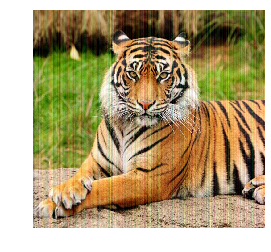

In [63]:
compress_image(filename)